# Exploratory Data Analysis Starter

## Import packages

In [35]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [36]:
# Load csv data into dataframe
client_df = pd.read_csv('client_data (1).csv')
price_df = pd.read_csv('price_data (1).csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [37]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [38]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [39]:
# Information about client_df
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [40]:
# Information about price_df
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [41]:
# Check for statistical measures of client_df
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [42]:
# Check for statistical measures of price_df
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


# Data Preprocessing and Cleaning

In [43]:
# Check for missing values
client_df.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [44]:
# Check for missing values
price_df.isna().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [45]:
# Replace "MISSING" with NAN values
client_df.replace("MISSING",  np.nan, inplace=True)
price_df.replace("MISSING",  np.nan, inplace=True)

In [46]:
# Check for missing values
client_df.isna().sum()

id                                   0
channel_sales                     3725
cons_12m                             0
cons_gas_12m                         0
cons_last_month                      0
date_activ                           0
date_end                             0
date_modif_prod                      0
date_renewal                         0
forecast_cons_12m                    0
forecast_cons_year                   0
forecast_discount_energy             0
forecast_meter_rent_12m              0
forecast_price_energy_off_peak       0
forecast_price_energy_peak           0
forecast_price_pow_off_peak          0
has_gas                              0
imp_cons                             0
margin_gross_pow_ele                 0
margin_net_pow_ele                   0
nb_prod_act                          0
net_margin                           0
num_years_antig                      0
origin_up                           64
pow_max                              0
churn                    

In [47]:
# Check for null values
price_df.isna().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [48]:
# Replace channel sales value with the next value in column
client_df["channel_sales"] = client_df["channel_sales"].ffill()

In [49]:
# Relace origin up with mode value of the column
mode_value = client_df["origin_up"].mode().iloc[0]
client_df["origin_up"].fillna(mode_value, inplace = True)

In [50]:
# Encode has gas with numerical values
client_df["has_gas"] = client_df["has_gas"].replace({"t":1,"f":0})

In [51]:
# Dropping Column Date Renewal - No Impact on target variable
client_df = client_df.drop(["date_renewal"], axis = 1)

In [52]:
# Converting date columns from string to datetime format
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'])
client_df['date_end'] = pd.to_datetime(client_df['date_end'])
client_df['date_modif_prod'] = pd.to_datetime(client_df['date_modif_prod'])

In [53]:
# Encoding Column date_modif_prod to 0 and 1 (1 : date_modif_prod between date_activ aand date_end; 0 : date_modif_prod not between date_activ aand date_end)
client_df["date_modif_prod"] = client_df.apply(lambda x : 1 if x["date_activ"] < x["date_modif_prod"] < x["date_end"] else 0, axis = 1)

In [54]:
# Calculate duration in months (Difference between date_activ and date_end)
client_df["contract_duration_m"] = round((client_df["date_end"] - client_df["date_activ"]).dt.days/30.4375, 2)

In [55]:
# Dropping date_activ and date_end column
client_df = client_df.drop(["date_activ","date_end"], axis = 1)

In [56]:
# Encoding channel sales and storing encoded values for track
channel_sales_categories = pd.Categorical(client_df["channel_sales"], ordered=True).categories
client_df['channel_sales'] = pd.Categorical(client_df['channel_sales'], ordered=True).codes
channel_sales_encodings = {code: category for code, category in enumerate(channel_sales_categories)}
channel_sales_encodings

{0: 'epumfxlbckeskwekxbiuasklxalciiuu',
 1: 'ewpakwlliwisiwduibdlfmalxowmwpci',
 2: 'fixdbufsefwooaasfcxdxadsiekoceaa',
 3: 'foosdfpfkusacimwkcsosbicdxkicaua',
 4: 'lmkebamcaaclubfxadlmueccxoimlema',
 5: 'sddiedcslfslkckwlfkdpoeeailfpeds',
 6: 'usilxuppasemubllopkaafesmlibmsdf'}

In [57]:
# Encoding origin up and storing encoded values for track
origin_up_categories = pd.Categorical(client_df["origin_up"], ordered=True).categories
client_df['origin_up'] = pd.Categorical(client_df['origin_up'], ordered=True).codes
origin_up_encodings = {code: category for code, category in enumerate(origin_up_categories)}
origin_up_encodings

{0: 'ewxeelcelemmiwuafmddpobolfuxioce',
 1: 'kamkkxfxxuwbdslkwifmmcsiusiuosws',
 2: 'ldkssxwpmemidmecebumciepifcamkci',
 3: 'lxidpiddsbxsbosboudacockeimpuepw',
 4: 'usapbepcfoloekilkwsdiboslwaxobdp'}

In [58]:
# Save cleaned data
client_df.to_csv("cleaned_client_data.csv", index=False)

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [59]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

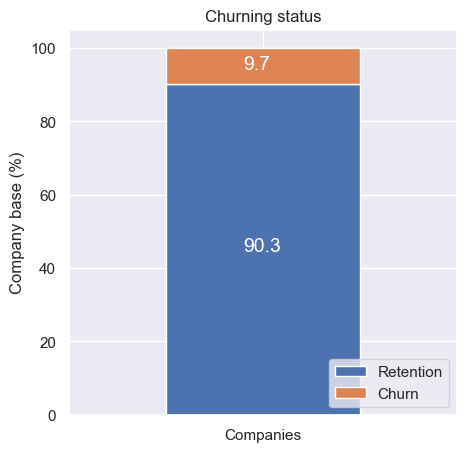

In [60]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

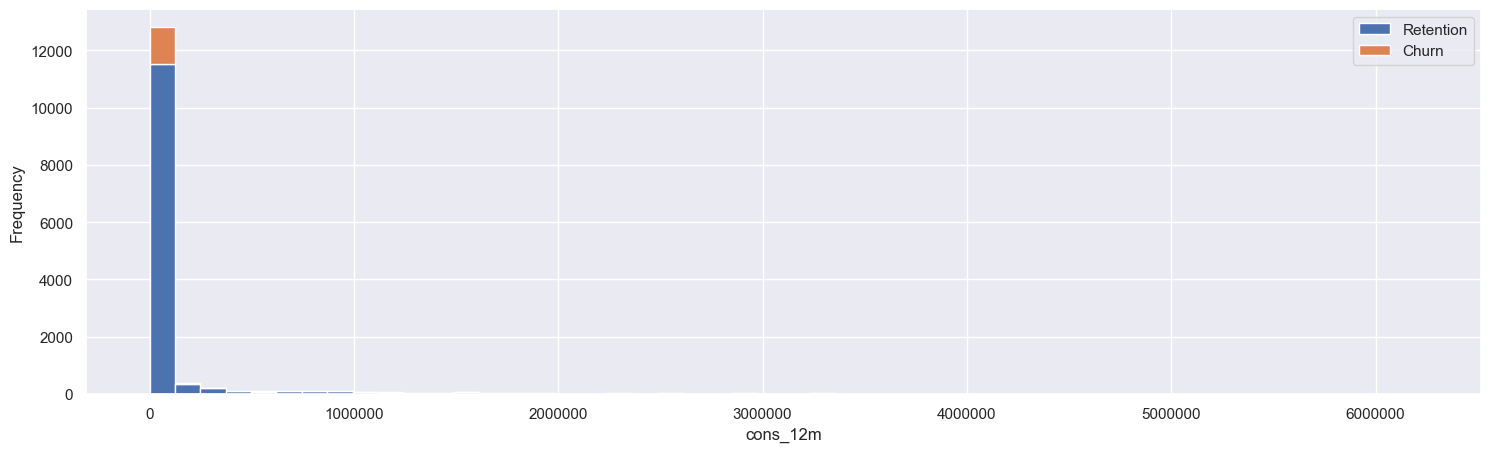

In [61]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

# Exploratory Data Analysis

In [62]:
# Load cleaned data
client_data = pd.read_csv("cleaned_client_data.csv")
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_modif_prod,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,...,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_duration_m
0,24011ae4ebbe3035111d65fa7c15bc57,3,0,54946,0,1,0.00,0,0.0,1.78,...,0.00,25.44,25.44,2,678.99,3,3,43.648,1,36.01
1,d29c2c54acc38ff3c0614d0a653813dd,3,4660,0,0,0,189.95,0,0.0,16.27,...,0.00,16.38,16.38,1,18.89,6,1,13.800,0,84.30
2,764c75f661154dac3a6c254cd082ea7d,3,544,0,0,0,47.96,0,0.0,38.72,...,0.00,28.60,28.60,1,6.60,6,1,13.856,0,72.02
3,bba03439a292a1e166f80264c16191cb,4,1584,0,0,0,240.04,0,0.0,19.83,...,0.00,30.22,30.22,1,25.46,6,1,13.200,0,72.02
4,149d57cf92fc41cf94415803a877cb4b,4,4425,0,526,0,445.75,526,0.0,131.73,...,52.32,44.91,44.91,1,47.98,6,1,19.800,0,73.76


In [63]:
# Check statistical importance for cleaned data
client_data.describe()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_modif_prod,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_duration_m
count,14606.000000,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,3.390593,1.592203e+05,2.809238e+04,16090.269752,0.500479,1868.614880,1399.762906,0.966726,63.086871,0.137283,...,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,2.196426,18.135136,0.097152,65.956267
std,1.223267,5.734653e+05,1.629731e+05,64364.196422,0.500017,2387.571531,3247.786255,5.108289,66.165783,0.024623,...,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,0.864035,13.534743,0.296175,19.873091
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.300000,0.000000,24.020000
25%,3.000000,5.674750e+03,0.000000e+00,0.000000,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,...,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,1.000000,12.500000,0.000000,48.000000
50%,3.000000,1.411550e+04,0.000000e+00,792.500000,1.000000,1112.875000,314.000000,0.000000,18.795000,0.143166,...,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,2.000000,13.856000,0.000000,60.075000
75%,4.000000,4.076375e+04,0.000000e+00,3383.000000,1.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,...,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,3.000000,19.172500,0.000000,77.310000
max,6.000000,6.207104e+06,4.154590e+06,771203.000000,1.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,...,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,4.000000,320.000000,1.000000,157.540000


In [64]:
# Check for categorical features
for feature in client_data:
    if len(client_data[feature].value_counts().to_list()) < 10:
        print(f'{feature}')

channel_sales
date_modif_prod
has_gas
origin_up
churn


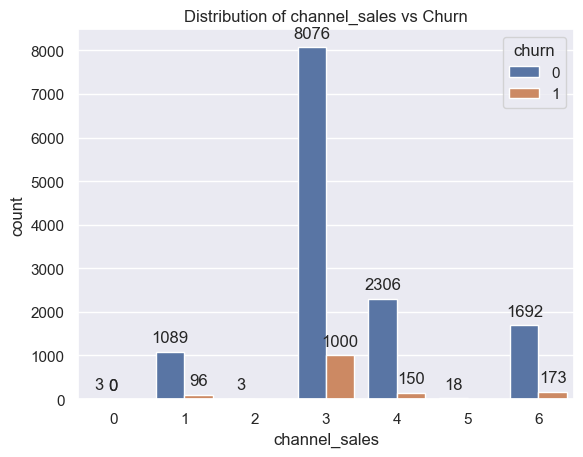

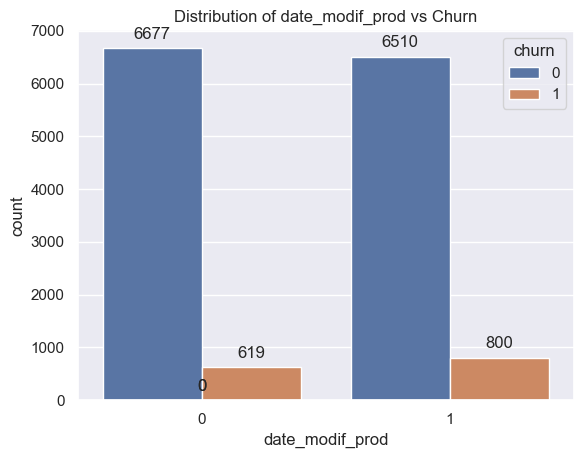

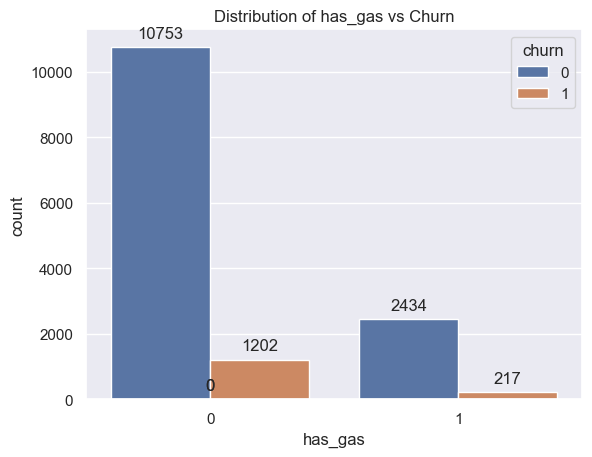

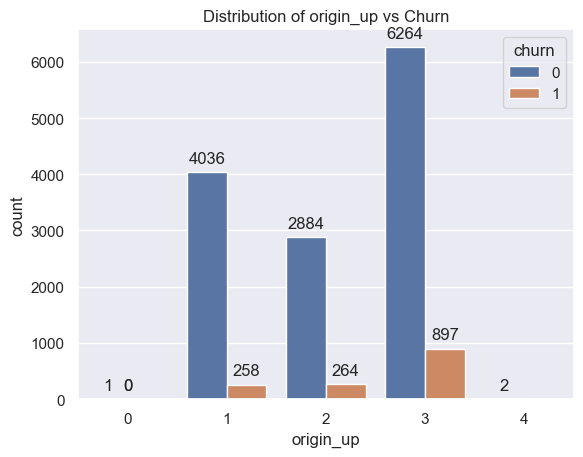

In [66]:
# Plot Count Plot for all categorical features against churn
categorical_data = client_data[['channel_sales', 'date_modif_prod', 'has_gas', 'origin_up']]

for feature in categorical_data:
    ax = sns.countplot(x = feature, hue = "churn", data=client_data)

    # Add count values on top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

    plt.title(f'Distribution of {feature} vs Churn')
    plt.show()